In [1]:
%pylab inline
from requests import post
from app.analysis import Quote
def screen_funds(*filter, min_assets=1, max_expense=1):
    query = 'query screen($filter:[String!]!,$limit:[FundLimitOptionInput!]!){viewer{screenFunds(filterCategory:$filter,limit:$limit,sort:{type:FUND_TOTAL_ASSETS,direction:DESC},first:100){edges{node{symbol}}}}}'
    variables = {'filter':filter,'limit':[{'type':'FUND_TOTAL_ASSETS','min':min_assets*1000000000,'inclusive':True},{'type':'FUND_NET_EXPENSE_RATIO','max':max_expense,'inclusive':True}]}
    r = post('https://lens.m1finance.com/graphql', json={'query': query, 'variables': variables}).json()
    return [n['node']['symbol'] for n in r['data']['viewer']['screenFunds']['edges']]

Populating the interactive namespace from numpy and matplotlib


In [2]:
quote = Quote(screen_funds('Alternatives'), 75, 5)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

from 2019-04-24 to 2019-07-08 - 12


In [3]:
stats = quote.statistics()
stats = stats[stats['shrp'] > 0]
print(len(stats))
stats

11


,len,mean,std,shrp,drawdown
Symbols,,,,,
RWX,47,0.309249,0.916707,0.294059,1.910171
XLRE,47,0.588814,1.893002,0.290085,4.835459
VNQI,47,0.302261,1.060832,0.247521,2.604699
ICF,47,0.504786,1.930060,0.240979,4.991450
REET,47,0.382220,1.451508,0.235987,3.361345
VNQ,47,0.454294,1.890730,0.219287,5.135487
RWO,47,0.332407,1.352124,0.216492,3.132428
IYR,47,0.440821,1.897107,0.211448,4.963136
USRT,47,0.406763,1.931825,0.190017,5.198662


evicted VNQI 0.8144245952355248
retry backlogs ['IYR', 'VNQ', 'RWR', 'SCHH', 'RWO', 'USRT', 'REET', 'ICF'] at 0.905 - 0.335
retry backlogs ['IYR', 'RWR', 'VNQ', 'SCHH', 'USRT', 'RWO', 'REET', 'ICF'] at 0.91 - 0.335
retry backlogs ['IYR', 'RWR', 'VNQ', 'SCHH', 'USRT', 'RWO', 'REET', 'ICF'] at 0.915 - 0.335
retry backlogs ['IYR', 'RWR', 'VNQ', 'SCHH', 'USRT', 'RWO', 'REET', 'ICF'] at 0.92 - 0.335
retry backlogs ['IYR', 'RWR', 'VNQ', 'SCHH', 'USRT', 'RWO', 'REET', 'ICF'] at 0.925 - 0.335
retry backlogs ['IYR', 'RWR', 'VNQ', 'SCHH', 'USRT', 'RWO', 'REET', 'ICF'] at 0.93 - 0.335
retry backlogs ['IYR', 'RWR', 'VNQ', 'SCHH', 'USRT', 'RWO', 'REET', 'ICF'] at 0.935 - 0.335
retry backlogs ['IYR', 'RWR', 'VNQ', 'SCHH', 'USRT', 'RWO', 'REET', 'ICF'] at 0.9400000000000001 - 0.335
retry backlogs ['IYR', 'RWR', 'VNQ', 'SCHH', 'USRT', 'RWO', 'REET', 'ICF'] at 0.9450000000000001 - 0.335
retry backlogs ['IYR', 'RWR', 'VNQ', 'SCHH', 'USRT', 'RWO', 'REET', 'ICF'] at 0.9500000000000001 - 0.335
retry backlo

,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
Portfolio,47.0,0.395898,1.076403,-1.996690,-0.394808,0.389458,1.206174,2.656086,0.330932,2.082452
RWX,47.0,0.309249,0.916707,-1.656313,-0.422265,0.077441,0.979277,2.321985,0.294059,1.910171
XLRE,47.0,0.588814,1.893002,-4.263532,-0.643475,0.725018,1.955427,4.319119,0.290085,4.835459


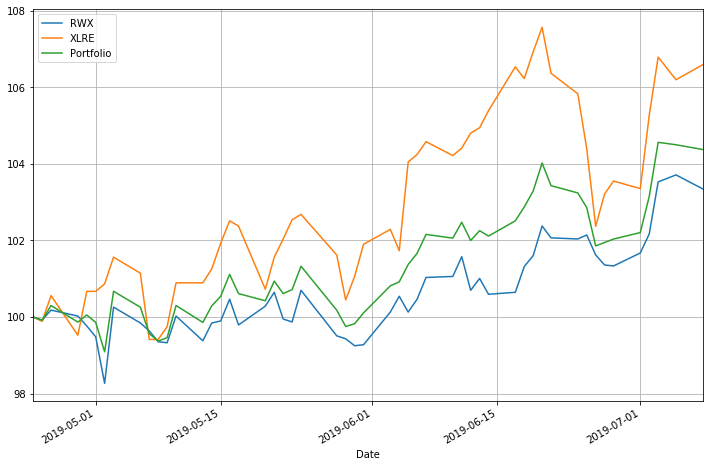

In [5]:
quote.setup_mask(stats.index)
ratio, shrp = quote.optimize_portfolio(.1)
print(ratio, shrp)
quote.setup_mask(ratio)
quote.graph(ratio)